# Churn prediction project
### (Machine Learning for Classification)

This project aims to identify customers that are likely to churn or stop using a service. Each customer has a score associated with the probability of churning. Considering this data, the company would send an email with discounts or other promotions to avoid churning.

The ML strategy applied to approach this problem is binary classification, which for one instance can be expressed as:




In the formula, yi is the model's prediction and belongs to {0,1}, being 0 the negative value or no churning, and 1 the positive value or churning. The output corresponds to the likelihood of churning.

In brief, the main idea behind this project is to build a model with historical data from customers and assign a score of the likelihood of churning.

#### Data preparation
First, I will do the following:
- Download the data, read it with pandas
- Assess/inspect the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


I will transpose the dataframe in order to view the complete features (i.e. rows become columns)

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


Next, I will inspect the data types

In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

I will convert the feature 'totalcharges' to a number data type, and ignore missing values)

In [8]:
pd.to_numeric(df.totalcharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [9]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')
tc.isnull().sum()

11

11 values are missing so I willinvestigate what is going on within the dataframe with reference tio the missing values. I will investigate the features 'customerid' and 'totalcharges' for more detail

In [10]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


There are missing values in 'totalcharges', so I will first convert the feature to a numeric data type, and replace these values with 0

In [11]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

Next, I will investigate the churn feature

In [13]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In ML, we care more about number representation (i.e. 0 or 1) where: 1 = churn (positive example), 0 = not churn (negative example).

I want to get the values that are 'yes' (I will pick just the first five)

In [14]:
(df.churn =='yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

If a value is yes, then it is 'true'. Conversely, if a value is no, it gets 'false'.
Now I will replace these boolean values wit numbers (0 or 1)

In [15]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

yes = 1 (customers churn); no = 0 (customers did not churn)

In [16]:
df.churn = (df.churn == 'yes').astype(int)

### Next, I will set up the validation framework 
I will perform the train/validation/test split with Scikit-Learn

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

Note that test size = 20%, and random state is to ensure the results are reproducible (i.e. same results can be gotten at any point in time)

Next, I will check the length/size of each

In [19]:
len(df_full_train) , len(df_test)

(5634, 1409)

Next, I will split the 'full_train' (80% of the original dataset) again into 'train' and 'validation sets'.    
Note that, to get the 'validation' set to be as big as the 20% that df_test is, I will need to get 25% of 'full_train' (which is equivalent to 20% of the original dataset)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [22]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


The indices are seen to be shuffled and I will like to reorder them (personal preference)

In [23]:
df_train.reset_index().head(3)

,index,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1


Next, I will drop the previous index

In [24]:
df_train.reset_index(drop=True).head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1


Next, I will repeat the process for the validation and test sets (and reassign all sets back to their respective variables)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Next, I will get my 'y' variables...
I write the churn variables in to the sets, and then delete the (initial) churn from my database

In [26]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [27]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

Notice that I did not delete the churn variable from df_full_train, and that's simply because I want to explore the target variable (churn) next.

### Exploratory Data Analysis
Next, I will:
- Check missing values
- Look at the target variable (churn)
- Look at the numerical and categorical variables

I will investigate these using the full_train dataset.   
First, i will reassign a new ordered index, and drop the reshuffled index (again, personal preference)..

In [28]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


Next, I will look at missing values..

In [29]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No missing values. So, next, I will look at the target variable (churn)

In [30]:
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int32

Next, I will look at the distribution within the churn feature (i.e. how many users churn versus how many do not churn)

In [31]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

The number of churned users is approximately 3 times less, but I will confirm the percentage using the normalize=True keyword. It divides the number by the total counts of elements in the series.

In [32]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

The churn rate (rate at which users churn) is approx 27%

We can also compute this (particular (Read: binary dataset)) churn rate using the mean.   
**N/B:** The mean can also give the churn rate because it is the sum of all 1s (values are 0 or 1) divided by n (the total count), i.e. the fraction of 1s in a binary dataset.

In [33]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

This can be interpreted as 27% of users are churning

Next, I will investigate the categorical  variables, and the numerical variables

In [34]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

I can see that some data types are not correctly assigned, for example, seniorcitizen is an integer whereas it is supposed to be a categorical variable.   
However, my variables of interest are tenure, monthlycharges, and totalcharges.  

I will create separate variable names to contain the numerical variables and the categorical variables 

In [35]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [36]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod',]

Invvestigating the numbe of unique variables in each categorical feature

In [37]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

About six of the variables are binary, about eight have 3 values and one has 4 values

### Feature importance: Churn Rate and Risk Ratio

Feature importance analysis (which is still a part of EDA) involves identifying which features affect the target variable.   
I will investigate:
- Churn Rate (within each group)
- Risk Ratio
- Mutual Information

#### Churn Rate (within each group)

In [38]:
df_full_train.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0


Investigating gender
- I will look at the subset of females & then males
- get their mean churn (churn rate)

In [39]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [40]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [41]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

The churn rate for males and females are not too different from the global churn.

Investigating churn within the 'partner' feature..

In [42]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

Some customers live with their partners (yes=2702) and some live without partners (no=2932)

In [43]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [44]:
global_churn - churn_partner

0.06493474245795922

The churn rate is approx 21% which looks like it is significantly less (6%) than the global churn rate

In [45]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [46]:
global_churn - churn_no_partner

-0.05984095297455855

The churn rate of those who live without partners is approx 6% more than global churn rate

This gives some idea that perhaps the partner variable is more important (relative to the gender variable) for predicting churn.   
So, I will measure the feature importance next..

#### Risk Ratio

Note that if the churn rate is positive (difference greater than zero), it means that the global churn is higher than the group churn and that indicates customers who are _less likely_ to churn. Conversely, if the churn rate is negative (difference less than zero), it means the global churn is lower than the group churn, indicating customers who are _more likely_ to churn (this gives information in absolute terms). 

Note that, we can also divide one by another, instead of just difference (divide the group churn rate by the global churn rate) (this gives information in relative terms).

In [47]:
churn_no_partner/global_churn

1.2216593879412643

In [48]:
churn_partner/global_churn

0.7594724924338315

Customers without a partner have a churn rate of 22% higher than global churn, while for customers with a partner, the churn rate is 24% lower than global churn.

Next, I will investigate the difference and risk ratio of churn rates per group relative to the global churn to determine importance

In [49]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


Next, I will create columns for the differences, and risk ratios in churn rates between global churn and group churn

In [50]:
df_group['diff'] = df_group['mean'] - global_churn 
df_group['risk'] = df_group['mean'] / global_churn 
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


Next, I will repeat the two previous steps for all the categorical variables (which I created and assigned to the variable name "categorical") by creating a function

Note, the last statement (df_group) to display my code is within the loop of my function so we won't see it. In order to display my function/code, I will import a special function from a library in IPython for displaying things (PS: Jupyter used to be ipython, hence the name)

In [51]:
from IPython.display import display

In [52]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn 
    df_group['risk'] = df_group['mean'] / global_churn 
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


These statistics provide valuable insights into churn rates among different customer groups:

**Gender:**   
Females have a slightly higher churn rate (27.68%) than the global churn (26%).   
Males have a slightly lower churn rate (26.32%) than the global churn.

**Senior Citizen:**   
Senior citizens have a significantly higher churn rate (41.34%) compared to the global churn.   
Non-senior citizens have a lower churn rate (24.23%) compared to the global churn.

**Partner:**   
Customers without a partner have a higher churn rate (32.98%) compared to the global churn.   
Customers with a partner have a lower churn rate (20.50%) compared to the global churn.

**Dependents:**   
Customers without dependents have a higher churn rate (31.38%) compared to the global churn.   
Customers with dependents have a lower churn rate (16.57%) compared to the global churn.

**Phone Service:**   
Customers with phone service have a slightly higher churn rate (27.30%) compared to the global churn.   
Customers without phone service have a lower churn rate (24.13%) compared to the global churn.

**Multiple Lines:**   
Customers with multiple lines have a slightly higher churn rate (29.07%) compared to the global churn.   
Customers with no phone service have a lower churn rate (24.13%) compared to the global churn.

**Internet Service:**   
Fiber optic internet service users have a significantly higher churn rate (42.52%) compared to the global churn.   
DSL internet service users have a lower churn rate (19.23%) compared to the global churn.

**Online Security:**   
Customers without online security have a significantly higher churn rate (42.09%) compared to the global churn.   
Customers with online security have a lower churn rate (15.32%) compared to the global churn.

**Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies:**   
Similar trends can be observed in these categories, where having the service leads to lower churn rates compared to not having it.

**Contract:**   
Month-to-month contract customers have a significantly higher churn rate (43.17%) compared to the global churn.   
One-year and two-year contract customers have lower churn rates (12.06% and 2.83%, respectively) compared to the global churn.

**Paperless Billing:**   
Customers with paperless billing have a slightly higher churn rate (33.82%) compared to the global churn.   
Customers without paperless billing have a lower churn rate (17.21%) compared to the global churn.

**Payment Method:**   
Customers using electronic checks have a significantly higher churn rate (45.59%) compared to the global churn.   
Customers using other payment methods have lower churn rates.

>These insights provide valuable information for targeted customer retention strategies. For instance, senior citizens, customers with partners, those with long-term contracts, and customers with certain additional services (like online security) are less likely to churn, while customers with month-to-month contracts and certain internet services (fiber optic) are more likely to churn.

In terms of importance, I will apply a metric which generates a number that describes the importance of the variable overall (for example, if contract is less or more important than gender, etc.) next.

### Feature Importance: Mutual Information
[Mutual information](https://en.wikipedia.org/wiki/Mutual_information) is a concept from information theory which tells us how much we can learn about one variable if we know the value of another

In [53]:
from sklearn.metrics import mutual_info_score

In [54]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

This, for example, tells how much we learn about churn by observing the value of a contract variable, and likewise how much we know about the contract variable by observing churn

Next, I will apply this metric to all the categorical variables in this dataset to see which of them has the highest (or least) mutual information score.   
**Note that** the mutual_info_score takes in two arguments *(and I want a metric that takes in one argument)* so I will wrap it in a function with one argument...


In [55]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

Now I will apply the function to my DataFrame...

In [56]:
df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

Next, I will sort it to have the values in descending order (highest/most important values first)

In [57]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

It can be seen that contract is the most important variable and gender is the least important variable. Also, variables like onlinesecurity, techsupport, internetservice are quite/relatively important, and in relative terms, gender, phoneservice, multiplelines, seniorcitizen, etc are not as important.

This mutual information score helps to show variables that are more important or less important for this model

### Feature Importance: Correlation
[Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a way to measure the importance for numerical features...

In [58]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


Next, I will correlate the numerical variables with churn

In [59]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

**Tenure:** There is a moderately negative correlation of approximately -0.352 with churn. This indicates that as the tenure (the duration a customer has been with the company) increases, the likelihood of churn decreases. In other words, customers who have been with the company for a longer time are less likely to churn.

**Monthly Charges:** There is a positive correlation of approximately 0.197 with churn. This suggests that as the monthly charges increase, the likelihood of churn also increases. Customers with higher monthly charges are more likely to churn.

**Total Charges:** There is a negative correlation of approximately -0.196 with churn. This implies that as the total charges incurred by a customer increase, the likelihood of churn decreases. Customers who have accumulated higher total charges are less likely to churn. This seems counterintuitive but can be explained by the fact that the longer customers stay with the company, the more charges they would incur, which explains the negative correlation..
>These correlations provide insights into the relationships between these numerical features and customer churn, which can be valuable for understanding factors that influence churn and for developing strategies to reduce it.

I will investigate this further using tenure for example

In [60]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

This indicates that among customers who have a tenure of 2 months or less, the average churn rate is approximately 59.53%.

In other words, nearly 59.53% of customers who have been with the company for a very short period (2 months or less) tend to churn. This is a significant churn rate within this specific group of new customers, suggesting that the early stages of the customer relationship are critical, and there might be factors during this period that lead to a higher likelihood of churn. Understanding and addressing these factors could be essential for retaining new customers.

In [61]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

This indicates that among customers who have a tenure greater than 2 months but less than or equal to 12 months, the average churn rate is approximately 39.94%.

In other words, for customers who have been with the company for a relatively short period, specifically between 2 months and 12 months, the churn rate is approx 40%. This suggests that there is a lower likelihood of churn among customers who have been with the company for a bit longer compared to the very new customers. This insight might be valuable for tailoring retention strategies for customers in this tenure range.

In [62]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

This indicates that among customers who have a tenure greater than 12 months, the average churn rate is approximately 17.63%.

In other words, for customers who have been with the company for more than a year (12 months or longer), the churn rate is around 17.63%. This suggests that there is a significantly lower likelihood of churn among customers with longer tenures, indicating that customer loyalty tends to increase with the duration of their relationship with the company. This insight highlights the importance of customer retention strategies for newer customers, as they are more likely to churn compared to long-standing customers.

I will visualize this for clearer insight..

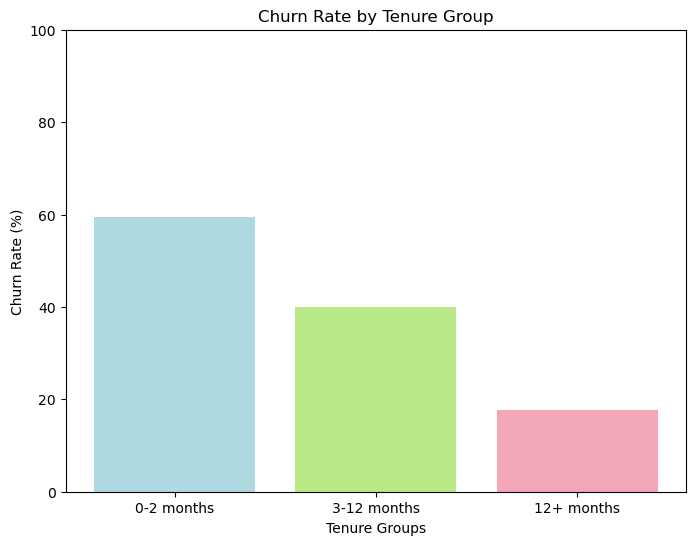

In [63]:
import matplotlib.pyplot as plt

# I will define tenure groups and corresponding churn rates
tenure_groups = ['0-2 months', '3-12 months', '12+ months']
churn_rates = [59.5, 39.9, 17.6] 

# Next, I will create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(tenure_groups, churn_rates, color=['#AED9E0', '#B8E986', '#F4A7B9'])
plt.xlabel('Tenure Groups')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Group')
plt.ylim(0, 100)  # y-axis limits set to represent percentages (0-100%)
plt.show()

> Increase in tenure leades to a decrease in churn rate (negative correlation)

I will create another example using monthlycharges...

In [64]:
df_full_train[df_full_train.monthlycharges <=20].churn.mean()

0.08795411089866156

This group includes customers with monthly charges less than or equal to $20. The churn rate in this group is relatively low, indicating that customers in this range are less likely to churn, with only 8.8% of them churning.

In [65]:
df_full_train[(df_full_train.monthlycharges >20) & (df_full_train.monthlycharges <50)].churn.mean()

0.1836890243902439

This group includes customers with monthly charges greater than $20 but less than $50. The churn rate in this group is higher than the previous group, suggesting that customers in this range have a moderate likelihood of churning, with 18.4% of them churning.

In [66]:
df_full_train[df_full_train.monthlycharges >=50].churn.mean()

0.3248223216635957

This group includes customers with monthly charges greater than or equal to $50. The churn rate in this group is the highest among the three ranges, indicating that customers with higher monthly charges are more likely to churn, with 32.5% of them churning.

I will visualize this...

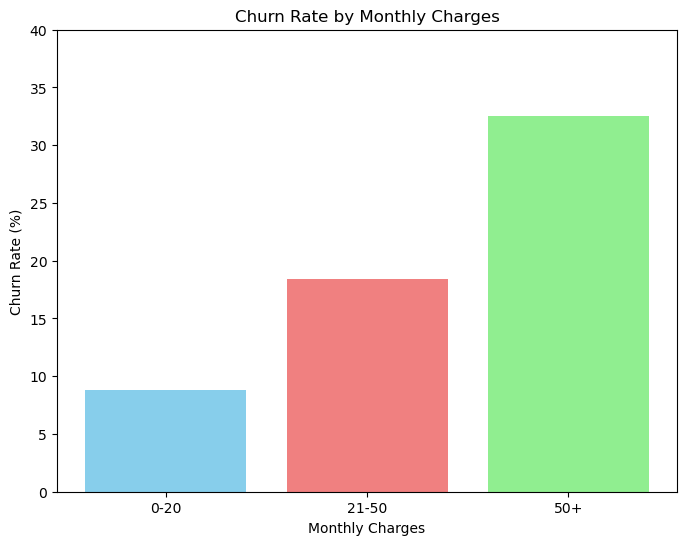

In [67]:
charge_ranges = ["0-20", "21-50", "50+"]
churn_rates_percent = [8.8, 18.4, 32.5] 

plt.figure(figsize=(8, 6))
plt.bar(charge_ranges, churn_rates_percent, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Monthly Charges")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Monthly Charges")
plt.ylim(0, 40) 
plt.show()

> The churn rate tends to increase as the monthly charges increase, with the highest churn rate observed in the group of customers with the highest monthly charges (Positive correlation)

Now, if I care about the importance but not the direction of the corelation values, I will proceed to absolut the values..

In [68]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

>Tenure is seen to be the most important variable, followed by monthlycharges, and totalcharges is the least important value.

### One-hot Encoding
Next, I will encode the categorical features using Scikit-Learn

In [69]:
from sklearn.feature_extraction import DictVectorizer

In [82]:
df_train[['gender', 'contract']].iloc[:100] #looking at the first 100

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [99]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records') #converting it to a dictionary

In [100]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [110]:
dv = DictVectorizer(sparse=False) #teach the vectorizer what kind of values are present

In [111]:
X_train = dv.fit_transform(train_dicts) #training & transforming our dictvectorizer into a feature matrix

In [112]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records') #repeat for validation dataset

In [113]:
X_val = dv.fit_transform(val_dicts) # I only transform the validation dataset, not fit it

### Logistic Regression
- Binary classification
- Linear vs logistic regression

In [114]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) #function used to convert a score into a probability

In [118]:
z = np.linspace(-7, 7, 51)

In [119]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

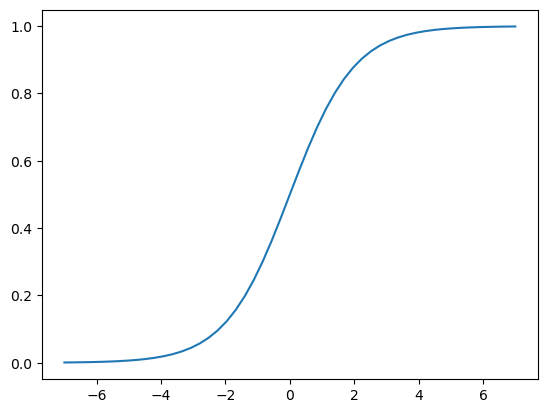

In [120]:
plt.plot(z, sigmoid(z));

In [121]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [123]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
     
    result = sigmoid(score) # in log reg, I convert the number/score I get into a value between 0 and 1 (major diff between log reg & lin reg)
    return result

### Training Logistic Regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [129]:
model.intercept_[0]

-0.1089760954030114

In [130]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [132]:
model.predict_proba(X_train) #first column = probability of belonging to the -ve class (not churning), while the 2nd column = probability of churning (column I am interested in)

array([[0.90467862, 0.09532138],
       [0.32051824, 0.67948176],
       [0.36617081, 0.63382919],
       ...,
       [0.46835456, 0.53164544],
       [0.95738015, 0.04261985],
       [0.30105881, 0.69894119]])

In [133]:
y_pred = model.predict_proba(X_train)[:, 1] #training dataset

In [134]:
y_pred = model.predict_proba(X_val)[:, 1] #validation dataset

In [136]:
churn_decision = (y_pred >= 0.5) #using a default threshhold of 0.5 for churn decision
churn_decision   #false = not churning, true = likely to churn

array([False, False, False, ..., False,  True,  True])

In [140]:
df_val[churn_decision].customerid #output reveals those who will churn and will get promotional emails, discounts, etc

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [141]:
#testing the (accuracy of the) model to check for correctly made predictions

In [142]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [144]:
churn_decision.astype(int)   #I am interested in how many of them match in total btw y_val & churn_decision

array([0, 0, 0, ..., 0, 1, 1])

In [146]:
y_val == churn_decision   #true if numbers match and false if they don't

array([ True,  True,  True, ...,  True,  True,  True])

In [154]:
#next, I use mean to see the number that actually match (correctly returns 80% of our predictions)

(y_val == churn_decision).mean()

0.8034066713981547

In [151]:
df_pred = pd.DataFrame()
df_pred['probaility'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred

,probaility,prediction,actual
0,0.008994,0,0
1,0.204768,0,0
2,0.212504,0,0
3,0.543161,1,1
4,0.214049,0,0
...,...,...,...
1404,0.313926,0,0
1405,0.039363,0,1
1406,0.136401,0,0
1407,0.799907,1,1


In [153]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probaility,prediction,actual,correct
0,0.008994,0,0,True
1,0.204768,0,0,True
2,0.212504,0,0,True
3,0.543161,1,1,True
4,0.214049,0,0,True
...,...,...,...,...
1404,0.313926,0,0,True
1405,0.039363,0,1,False
1406,0.136401,0,0,True
1407,0.799907,1,1,True


### Model Interpretation
- Look at the coefficients
- Train a smaller model with fewer features

In [163]:
dv.feature_names_ #or dv.get_feature_names_out()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [162]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [166]:
#joining both lines of code:

dict(zip(dv.feature_names_, model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [167]:
#training a smaller model

small = ['contract', 'tenure', 'monthlycharges']

In [170]:
df_train[small].iloc[:10].to_dict(orient='records') #use this for vectorizer

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [171]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [172]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [174]:
dv_small.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [175]:
X_train_small = dv_small.transform(dicts_train_small)

In [176]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [179]:
w0 = model_small.intercept_[0]
w0

-2.4767756587999803

In [181]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [182]:
#joining them together

dict(zip(dv_small.feature_names_, w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [184]:
'''
For example, if there is a customer who is on a monthly contract, pays monthly charges of $50, 
and has been with the company for 5 months, it can be calculated as:
'''

sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036))     #note that -2.47 is the intercept (w0)

0.41824062315816374

the probability of this customer churning is 42%

### Using the Model

In [185]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [186]:
#create dictvectorizer

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [187]:
y_full_train = df_full_train.churn.values

In [188]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)   #I have my model

LogisticRegression()

In [189]:
#repeat the same process for the test dataset

dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [190]:
#apply dictvectorizer

X_test = dv.transform(dicts_test)  #here, I only transform, not fit

In [192]:
#now, apply model

y_pred = model.predict_proba(X_test)[:, 1]

In [193]:
#make decisions (e.g. clients higher than 0.5 are more likely to churn)

churn_decision = (y_pred >= 0.5)

In [194]:
#test if churn decision is correct (compute Accuracy)

(churn_decision == y_test).mean()

0.815471965933286

Accuracy is 81.5% accurate (slightly more accurate. We want to avoid a situation where the difference in accuracy is large)

In [197]:
'''
Using the model: For example, I would like to find out if there is a customer who is more likely to leave or not, 
and if they are more likely to leave, I'd like to send them a promotional email asking them not to leave. 
I will choose a random customer from my data set
'''

customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [205]:
'''
I will proceed to compute a score for a male, who is a senior, who lives with a partner, and has dependents, 
no tech support, have streaming tv, on monthly contract, have tenure of 32 months, with monthly charges of 93.95, etc
'''

X_small = dv.transform([customer])

In [206]:
X_small.shape

(1, 45)

1 customer with 45 features

In [207]:
#put into the model

model.predict_proba(X_small)[0, 1]

0.4056810977859694

The model tells us that this senior male has only 40% of churning, so I will not send him a promotional email

In [208]:
#check if he was actually going to churn

y_test[10]

0

He was not going to churn so in this case, my decision not to send him a promotional email was correct

In [210]:
# Example 2

customer2 = dicts_test[-1]
customer2

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [217]:
'''
I will proceed to compute a score for a female, who is not a senior (younger), who lives with a partner, 
and has dependents, no tech support, have streaming tv, on monthly contract, has tenure of 17 months, 
with monthly charges of 104.2, etc
'''

X_small = dv.transform([customer2])

In [218]:
#put into the model

model.predict_proba(X_small)[0, 1]

0.5968852088245516

The model tells us that this customer2 has almost 60% of churning, so I will send her a promotional email, offer some discount to change her mind, etc.

In [219]:
#check if she was actually going to churn

y_test[-1]

1

She was going to churn so in this case, my decision to send her a promotional email was correct